In [2]:
import sys
sys.path.insert(0, "/data/hpcdata/users/anddon76/icenet/icenet-experimental")
sys.path.insert(0, "/data/hpcdata/users/anddon76/icenet/icenet")
sys.path.insert(0, "/data/hpcdata/users/anddon76/icenet/icenet-experimental/backbone-v2")
import os
os.chdir("/data/hpcdata/users/anddon76/icenet/icenet-experimental/")
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import iris
from iris.coords import DimCoord

## 1. Harmonise Projections

In [7]:
amsr_cube = iris.load_cube("/data/twins/wip/common/sic/amsr2/south/asi-AMSR2-s6250-20230102-v5.4.nc")
cs = amsr_cube.coord_system()
harmonised_cubes = {"amsr": amsr_cube}  # dict with data cubes with consistent projection
for var in ["tas", "uas", "vas"]:
    predictor = xr.open_dataset(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/era5/south/{var}/2023.nc")
    predictor_cube = iris.load_cube(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/era5/south/{var}/2023.nc")
    predictor_cube.add_dim_coord(DimCoord(predictor.yc.to_numpy(), standard_name="projection_y_coordinate", units="m", var_name="yc"), 1)
    predictor_cube.add_dim_coord(DimCoord(predictor.xc.to_numpy(), standard_name="projection_x_coordinate", units="m", var_name="xc"), 2)
    predictor_cube.coord('projection_y_coordinate').coord_system = cs #iris.coord_systems.GeogCS(6367470.0)
    predictor_cube.coord('projection_x_coordinate').coord_system = cs #iris.coord_systems.GeogCS(6367470.0)
    predictor_cube_on_amsr = predictor_cube.regrid(amsr_cube, iris.analysis.Linear())
    harmonised_cubes[var] = predictor_cube_on_amsr

/tmp/ipykernel_8710/1613457754.py:1: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  amsr_cube = iris.load_cube("/data/twins/wip/common/sic/amsr2/south/asi-AMSR2-s6250-20230102-v5.4.nc")
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'tas'
  warnings.warn(message % (name, nc_var_name))
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'uas'
  warnings.warn(message % (name, nc_var_name))
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-

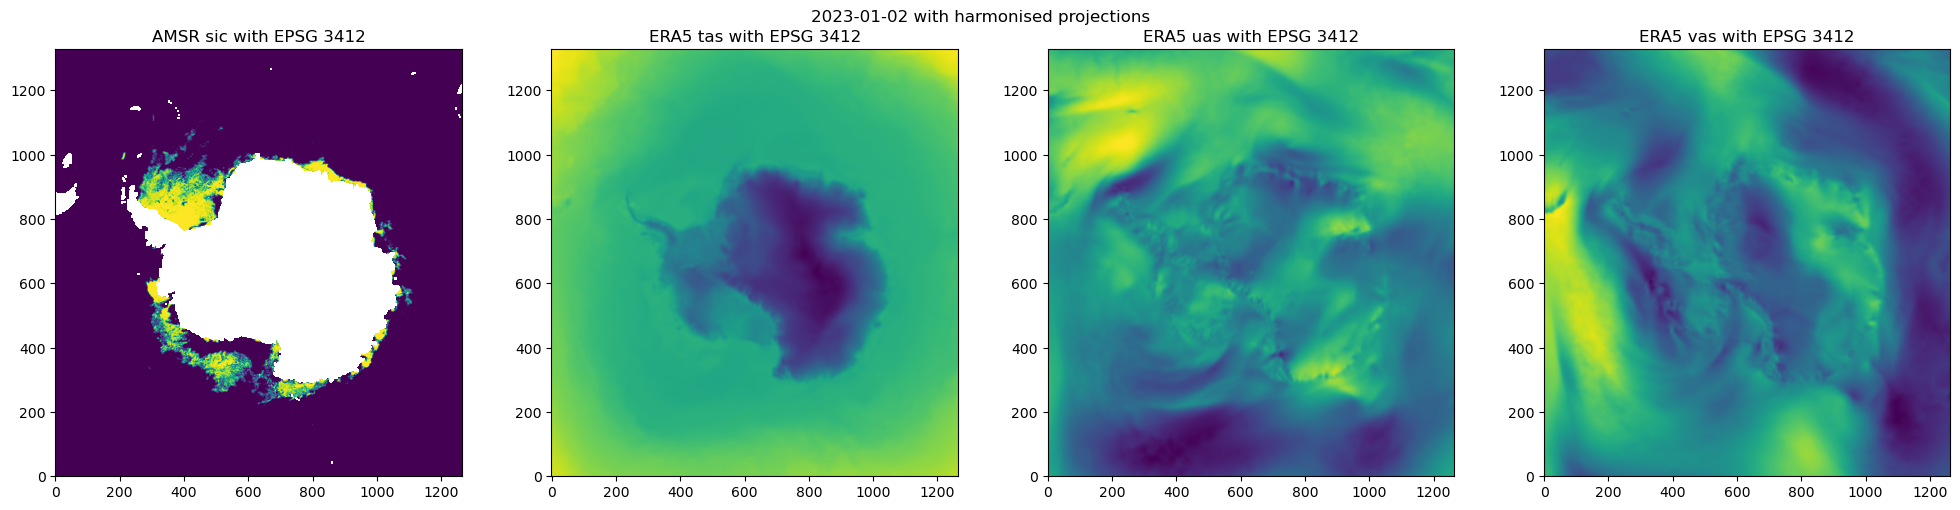

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(amsr_cube.data, origin="lower")
ax[0].set_title("AMSR sic with EPSG 3412")
for i, var in enumerate(["tas", "uas", "vas"]):
    da = xr.DataArray.from_iris(harmonised_cubes[var])
    img = da.sel(time=pd.to_datetime("2023-01-02")).to_numpy()
    ax[i+1].imshow(img, origin="lower")
    ax[i+1].set_title(f"ERA5 {var} with EPSG 3412")
plt.suptitle("2023-01-02 with harmonised projections")
plt.tight_layout()

## 2. Produce Dataset

In [39]:
fnames = sorted([f for f in os.listdir("/data/twins/wip/common/sic/amsr2/south/")])
fnames

['asi-AMSR2-s6250-20130101-v5.4.nc',
 'asi-AMSR2-s6250-20130102-v5.4.nc',
 'asi-AMSR2-s6250-20130103-v5.4.nc',
 'asi-AMSR2-s6250-20130104-v5.4.nc',
 'asi-AMSR2-s6250-20130105-v5.4.nc',
 'asi-AMSR2-s6250-20130106-v5.4.nc',
 'asi-AMSR2-s6250-20130107-v5.4.nc',
 'asi-AMSR2-s6250-20130108-v5.4.nc',
 'asi-AMSR2-s6250-20130109-v5.4.nc',
 'asi-AMSR2-s6250-20130110-v5.4.nc',
 'asi-AMSR2-s6250-20130111-v5.4.nc',
 'asi-AMSR2-s6250-20130112-v5.4.nc',
 'asi-AMSR2-s6250-20130113-v5.4.nc',
 'asi-AMSR2-s6250-20130114-v5.4.nc',
 'asi-AMSR2-s6250-20130115-v5.4.nc',
 'asi-AMSR2-s6250-20130116-v5.4.nc',
 'asi-AMSR2-s6250-20130117-v5.4.nc',
 'asi-AMSR2-s6250-20130118-v5.4.nc',
 'asi-AMSR2-s6250-20130119-v5.4.nc',
 'asi-AMSR2-s6250-20130120-v5.4.nc',
 'asi-AMSR2-s6250-20130121-v5.4.nc',
 'asi-AMSR2-s6250-20130122-v5.4.nc',
 'asi-AMSR2-s6250-20130123-v5.4.nc',
 'asi-AMSR2-s6250-20130124-v5.4.nc',
 'asi-AMSR2-s6250-20130125-v5.4.nc',
 'asi-AMSR2-s6250-20130126-v5.4.nc',
 'asi-AMSR2-s6250-20130127-v5.4.nc',
 

/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'tas'
  warnings.warn(message % (name, nc_var_name))
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'uas'
  warnings.warn(message % (name, nc_var_name))
/data/hpcdata/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'vas'
  warnings.warn(message % (name, nc_var_name))


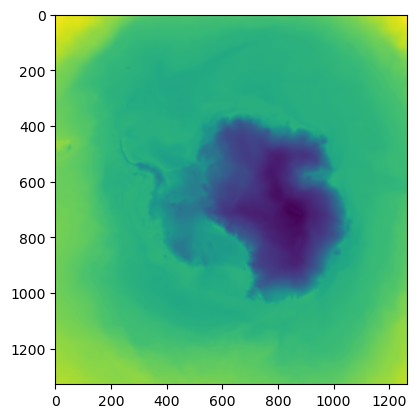

In [48]:
def get_era5_cubes(year):
    for var in ["tas", "uas", "vas"]:
        predictor = xr.open_dataset(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/era5/south/{var}/{year}.nc")
        predictor_cube = iris.load_cube(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/era5/south/{var}/{year}.nc")
        predictor_cube.add_dim_coord(DimCoord(predictor.yc.to_numpy(), standard_name="projection_y_coordinate", units="m", var_name="yc"), 1)
        predictor_cube.add_dim_coord(DimCoord(predictor.xc.to_numpy(), standard_name="projection_x_coordinate", units="m", var_name="xc"), 2)
        predictor_cube.coord('projection_y_coordinate').coord_system = cs #iris.coord_systems.GeogCS(6367470.0)
        predictor_cube.coord('projection_x_coordinate').coord_system = cs #iris.coord_systems.GeogCS(6367470.0)
        predictor_cube_on_amsr = predictor_cube.regrid(amsr_cube, iris.analysis.Linear())
        harmonised_cubes[var] = xr.DataArray.from_iris(predictor_cube_on_amsr)
    return harmonised_cubes

era5_cubes = get_era5_cubes(2013)  # dataset starts in 2013
tas_t_2 = era5_cubes["tas"].sel(time=pd.to_datetime("20130101")).to_numpy()[::-1]
plt.imshow(tas_t_2)

2013

In [ ]:
# helper function to get era5 data in proper projection
def get_era5_cubes(year):
    for var in ["tas", "uas", "vas"]:
        predictor = xr.open_dataset(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/era5/south/{var}/{year}.nc")
        predictor_cube = iris.load_cube(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/data/era5/south/{var}/{year}.nc")
        predictor_cube.add_dim_coord(DimCoord(predictor.yc.to_numpy(), standard_name="projection_y_coordinate", units="m", var_name="yc"), 1)
        predictor_cube.add_dim_coord(DimCoord(predictor.xc.to_numpy(), standard_name="projection_x_coordinate", units="m", var_name="xc"), 2)
        predictor_cube.coord('projection_y_coordinate').coord_system = cs #iris.coord_systems.GeogCS(6367470.0)
        predictor_cube.coord('projection_x_coordinate').coord_system = cs #iris.coord_systems.GeogCS(6367470.0)
        predictor_cube_on_amsr = predictor_cube.regrid(amsr_cube, iris.analysis.Linear())
        harmonised_cubes[var] = xr.DataArray.from_iris(predictor_cube_on_amsr)
    return harmonised_cubes
    
# filter annoying iris warnings
import warnings 
warnings.filterwarnings('ignore')

# produce actual dataset
fnames = sorted([f for f in os.listdir("/data/twins/wip/common/sic/amsr2/south/")])
climatology = np.load("/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera_climatology.npy")
era5_cubes = get_era5_cubes(2013)  # in theory, this will cache and stay fast after loading first time
for f_t_2 in tqdm(fnames[:-2]):  # stop such that we have two days ahead
    try:
        
        # produce t-2, t-1 predictors of ice and target t of ice
        ice_t_2 = xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t_2}")
        date_t_2 = pd.to_datetime(f_t_2.split("-")[3])
        date_t_1 = date_t_2 + pd.Timedelta(1, "D")
        f_t_1 = f"asi-AMSR2-s6250-{date_t_1.strftime('%Y%m%d')}-v5.4.nc"
        ice_t_1 =  xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t_1}")
        date_t = date_t_1 + pd.Timedelta(1, "D")
        f_t = f"asi-AMSR2-s6250-{date_t.strftime('%Y%m%d')}-v5.4.nc"
        ice_t = xr.open_dataset(f"/data/twins/wip/common/sic/amsr2/south/{f_t}")
        ice_t = ice_t.z[::-1][525:653, 150:278] / 100  # convert 0-100 to 0-1
        ice_t_1 = ice_t_1.z[::-1][525:653, 150:278] / 100  # convert 0-100 to 0-1
        ice_t_2 = ice_t_2.z[::-1][525:653, 150:278] / 100 # convert 0-100 to 0-1

        # produce climatology, land, cos, sin masks as predictors
        clim = climatology[date_t.dayofyear % 365] / 100  # if leap year, just wrap around, also convert 0-100 to 0-1
        land = np.where(np.isnan(ice_t), 0, 1)  # make sea == 1 and land == 0 for network activation
        cos = np.ones_like(ice_t) * np.cos(2 * np.pi * date_t.dayofyear / 366)
        sin = np.ones_like(ice_t) * np.sin(2 * np.pi * date_t.dayofyear / 366)

        # update era5_cubes when year changes
        if pd.to_datetime(era5_cubes["tas"].isel(time=0).time.to_numpy()).year != date_t_2.year:
            era5_cubes = get_era5_cubes(date_t_2.year)

        # produce era5 predictors, first for t-2
        tas_t_2 = era5_cubes["tas"].sel(time=date_t_2).to_numpy()[::-1][525:653, 150:278]
        uas_t_2 = era5_cubes["uas"].sel(time=date_t_2).to_numpy()[::-1][525:653, 150:278]
        vas_t_2 = era5_cubes["vas"].sel(time=date_t_2).to_numpy()[::-1][525:653, 150:278]

        # produce era5 predictors, next for t-1
        tas_t_1 = era5_cubes["tas"].sel(time=date_t_1).to_numpy()[::-1][525:653, 150:278]
        uas_t_1 = era5_cubes["uas"].sel(time=date_t_1).to_numpy()[::-1][525:653, 150:278]
        vas_t_1 = era5_cubes["vas"].sel(time=date_t_1).to_numpy()[::-1][525:653, 150:278]

        # produce era5 predictors, finally for t (lookahead to forecast date)
        tas_t = era5_cubes["tas"].sel(time=date_t).to_numpy()[::-1][525:653, 150:278]
        uas_t = era5_cubes["uas"].sel(time=date_t).to_numpy()[::-1][525:653, 150:278]
        vas_t = era5_cubes["vas"].sel(time=date_t).to_numpy()[::-1][525:653, 150:278]

        # compile sample
        sample = np.array([ice_t, ice_t_1, ice_t_2,
                           tas_t, tas_t_1, tas_t_2,
                           uas_t, uas_t_1, uas_t_2,
                           vas_t, vas_t_1, vas_t_2,
                           clim, land, cos, sin], dtype=np.float32)  # play around with dtype for space/precision tradeoff
        np.save(f"/data/hpcdata/users/anddon76/icenet/icenet-experimental/processed/amsr_rothera_with_era5/{date_t.strftime('%Y%m%d')}", sample)

    except Exception as e:
        print(f"Skipping {f_t_2}: {e}")

  0%|          | 0/3884 [00:00<?, ?it/s]

  0%|          | 1/3884 [00:36<39:03:50, 36.22s/it]

In [ ]:
t